In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing part
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv("C:/Users/isubh/OneDrive/Desktop/weather_prediction_dataset.csv")
print (data)

          DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     20000101      1                  8            0.89          1.0286   
1     20000102      1                  8            0.87          1.0318   
2     20000103      1                  5            0.81          1.0314   
3     20000104      1                  7            0.79          1.0262   
4     20000105      1                  5            0.90          1.0246   
...        ...    ...                ...             ...             ...   
3649  20091228     12                  7            0.82          1.0084   
3650  20091229     12                  7            0.92          1.0028   
3651  20091230     12                  8            0.92          0.9979   
3652  20091231     12                  7            0.93          0.9958   
3653  20100101      1                  8            0.93          0.9965   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                 

In [75]:
#A
shape_of_data =data.shape
print(shape_of_data)

(3654, 166)


In [77]:
#B
missing_values = data.isnull().sum()
print(missing_values)

DATE                    0
MONTH                   0
BASEL_cloud_cover       0
BASEL_humidity          0
BASEL_pressure          0
                       ..
TOURS_precipitation     0
TOURS_temp_mean         0
TOURS_temp_min          0
TOURS_temp_max          0
BUDAPEST_BBQ_weather    0
Length: 166, dtype: int64


In [79]:
#C
data_types = data.dtypes
print(data_types)

DATE                      int64
MONTH                     int64
BASEL_cloud_cover         int64
BASEL_humidity          float64
BASEL_pressure          float64
                         ...   
TOURS_precipitation     float64
TOURS_temp_mean         float64
TOURS_temp_min          float64
TOURS_temp_max          float64
BUDAPEST_BBQ_weather       bool
Length: 166, dtype: object


In [81]:
#D
zeros = (data == 0).sum()
print(zeros)

DATE                       0
MONTH                      0
BASEL_cloud_cover         97
BASEL_humidity             0
BASEL_pressure             0
                        ... 
TOURS_precipitation     1875
TOURS_temp_mean            9
TOURS_temp_min            10
TOURS_temp_max             2
BUDAPEST_BBQ_weather    2270
Length: 166, dtype: int64


In [83]:
#E
mean_temp_budapest = data['BUDAPEST_temp_mean'].mean()
print(mean_temp_budapest)

12.174849480021892


In [85]:
budapest_data = data.filter(like='BUDAPEST')
data = budapest_data
print(data)

      BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                        3               0.92             1.0268   
1                        8               0.94             1.0297   
2                        6               0.95             1.0295   
3                        8               0.94             1.0252   
4                        5               0.88             1.0235   
...                    ...                ...                ...   
3649                     1               0.61             1.0072   
3650                     3               0.59             1.0113   
3651                     8               0.93             1.0040   
3652                     6               0.90             0.9984   
3653                     6               0.65             1.0169   

      BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                          0.52                    0.00                3.7   
1                          

In [87]:
budapest_data = budapest_data.head(1000)
data = budapest_data
print(data)

     BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                       3               0.92             1.0268   
1                       8               0.94             1.0297   
2                       6               0.95             1.0295   
3                       8               0.94             1.0252   
4                       5               0.88             1.0235   
..                    ...                ...                ...   
995                     8               0.91             1.0094   
996                     8               0.89             1.0045   
997                     8               0.98             1.0063   
998                     8               0.95             1.0100   
999                     5               0.77             1.0110   

     BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                         0.52                    0.00                3.7   
1                         0.14           

In [89]:
correlation_matrix = data.corr()
print(correlation_matrix)

                           BUDAPEST_cloud_cover  BUDAPEST_humidity  \
BUDAPEST_cloud_cover                   1.000000           0.617692   
BUDAPEST_humidity                      0.617692           1.000000   
BUDAPEST_pressure                     -0.272913          -0.013214   
BUDAPEST_global_radiation             -0.589835          -0.801484   
BUDAPEST_precipitation                 0.306870           0.286955   
BUDAPEST_sunshine                     -0.804791          -0.786859   
BUDAPEST_temp_mean                    -0.302434          -0.542957   
BUDAPEST_temp_max                     -0.353046          -0.569694   
BUDAPEST_BBQ_weather                  -0.399086          -0.529619   

                           BUDAPEST_pressure  BUDAPEST_global_radiation  \
BUDAPEST_cloud_cover               -0.272913                  -0.589835   
BUDAPEST_humidity                  -0.013214                  -0.801484   
BUDAPEST_pressure                   1.000000                  -0.122927   

In [91]:
np.fill_diagonal(correlation_matrix.values, np.nan)

max_corr_value = correlation_matrix['BUDAPEST_BBQ_weather'].abs().max()
max_corr_feature = correlation_matrix['BUDAPEST_BBQ_weather'].abs().idxmax()

print(f"The feature most correlated with 'BUDAPEST_BBQ_weather' is '{max_corr_feature}' with a correlation of {max_corr_value:.2f}")

The feature most correlated with 'BUDAPEST_BBQ_weather' is 'BUDAPEST_global_radiation' with a correlation of 0.66


In [93]:
abs_corr_matrix = correlation_matrix.abs()
max_corr_pair = abs_corr_matrix.unstack().idxmax()

feature_1 = max_corr_pair[0]
feature_2 = max_corr_pair[1]

print(f"The two most highly correlated features are '{feature_1}' and '{feature_2}' with a correlation of {abs_corr_matrix.loc[feature_1, feature_2]:.2f}")

The two most highly correlated features are 'BUDAPEST_temp_mean' and 'BUDAPEST_temp_max' with a correlation of 0.99


In [95]:
X = data.drop('BUDAPEST_BBQ_weather', axis=1)  # It takes into consideration all columns except the target
y = data['BUDAPEST_BBQ_weather']  # It take into consideration the target variable

# Now I am splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 8)
X_test shape: (200, 8)
y_train shape: (800,)
y_test shape: (200,)


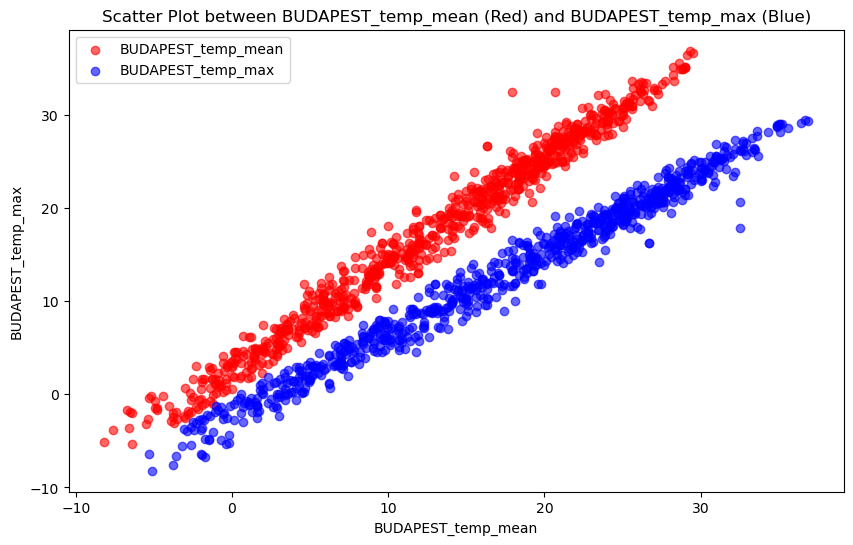

In [99]:
#Plotting Two Highly Correlated Features
plt.figure(figsize=(10, 6))
plt.scatter(X_train[feature_1], X_train[feature_2], color='red', alpha=0.6, label=feature_1)
plt.scatter(X_train[feature_2], X_train[feature_1], color='blue', alpha=0.6, label=feature_2)
plt.title(f'Scatter Plot between {feature_1} (Red) and {feature_2} (Blue)')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.show()

In [101]:
null_counts_per_feature = data.isnull().sum()
print("\n Number of NULL values in each feature:\n", null_counts_per_feature)

total_nulls = data.isnull().sum().sum()
print(f"\nTotal number of NULL values in the entire dataset: {total_nulls}")


 Number of NULL values in each feature:
 BUDAPEST_cloud_cover         0
BUDAPEST_humidity            0
BUDAPEST_pressure            0
BUDAPEST_global_radiation    0
BUDAPEST_precipitation       0
BUDAPEST_sunshine            0
BUDAPEST_temp_mean           0
BUDAPEST_temp_max            0
BUDAPEST_BBQ_weather         0
dtype: int64

Total number of NULL values in the entire dataset: 0
